<a href="https://colab.research.google.com/github/minhhung250302/TrinhMinhHungUTE/blob/main/20_9_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.1 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=b2e674b73f9f97e2220c87798ce1988631e425dd9204c1c06d05ce8f081d3c6a
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


31.034482758620694


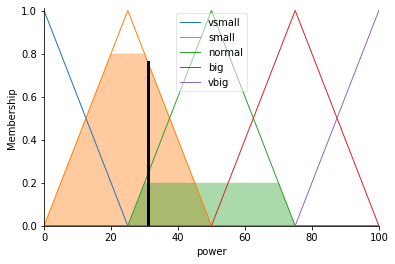

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(10,121,5),'time')
rice = ctrl.Antecedent(np.arange(100,1001,5),'rice')
power = ctrl.Consequent(np.arange(0,101,5),'power')
time['vfast']=fuzz.trimf(time.universe,[10,10,40])
time['fast']=fuzz.trimf(time.universe,[10,40,70])
time['normal']=fuzz.trimf(time.universe,[40,70,95])
time['low']=fuzz.trimf(time.universe,[70,95,120])
time['vlow']=fuzz.trimf(time.universe,[95,120,120])
rice['vfew']=fuzz.trimf(rice.universe,[100,100,325])
rice['few']=fuzz.trimf(rice.universe,[100,325,550])
rice['normal']=fuzz.trimf(rice.universe,[325,550,775])
rice['much']=fuzz.trimf(rice.universe,[550,775,1000])
rice['vmuch']=fuzz.trimf(rice.universe,[775,1000,1000])
power['vsmall']=fuzz.trimf(power.universe,[0,0,25])
power['small']=fuzz.trimf(power.universe,[0,25,50])
power['normal']=fuzz.trimf(power.universe,[25,50,75])
power['big']=fuzz.trimf(power.universe,[50,75,100])
power['vbig']=fuzz.trimf(power.universe,[75,100,100])
rule1 = ctrl.Rule(time['vfast']&rice['vfew'],power['vsmall'])
rule2 = ctrl.Rule(time['vfast']&rice['few'],power['vsmall'])
rule3 = ctrl.Rule(time['vfast']&rice['normal'],power['vsmall'])
rule4 = ctrl.Rule(time['vfast']&rice['much'],power['small'])
rule5 = ctrl.Rule(time['vfast']&rice['vmuch'],power['normal'])
rule6 = ctrl.Rule(time['fast']&rice['vfew'],power['vsmall'])
rule7 = ctrl.Rule(time['fast']&rice['few'],power['small'])
rule8 = ctrl.Rule(time['fast']&rice['normal'],power['small'])
rule9 = ctrl.Rule(time['fast']&rice['much'],power['normal'])
rule10 = ctrl.Rule(time['fast']&rice['vmuch'],power['big'])
rule11 = ctrl.Rule(time['normal']&rice['vfew'],power['vsmall'])
rule12 = ctrl.Rule(time['normal']&rice['few'],power['small'])
rule13 = ctrl.Rule(time['normal']&rice['normal'],power['normal'])
rule14 = ctrl.Rule(time['normal']&rice['much'],power['big'])
rule15 = ctrl.Rule(time['normal']&rice['vmuch'],power['vbig'])
rule16 = ctrl.Rule(time['low']&rice['vfew'],power['small'])
rule17 = ctrl.Rule(time['low']&rice['few'],power['normal'])
rule18 = ctrl.Rule(time['low']&rice['normal'],power['big'])
rule19 = ctrl.Rule(time['low']&rice['much'],power['big'])
rule20 = ctrl.Rule(time['low']&rice['vmuch'],power['vbig'])
rule21 = ctrl.Rule(time['vlow']&rice['vfew'],power['normal'])
rule22 = ctrl.Rule(time['vlow']&rice['few'],power['big'])
rule23 = ctrl.Rule(time['vlow']&rice['normal'],power['vbig'])
rule24 = ctrl.Rule(time['vlow']&rice['much'],power['vbig'])
rule25 = ctrl.Rule(time['vlow']&rice['vmuch'],power['vbig'])
powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6, rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16, rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['time'] = 100
powering.input['rice'] = 100
powering.compute()
print(powering.output['power'])
power.view(sim=powering)